# 435 HW2 Xiaowei Yuan

## 13.1

In [3]:
from autograd import grad 
from autograd import numpy as np
from mlrefined_libraries import math_optimization_library as optlib
import matplotlib.pyplot as plt
from mlrefined_libraries import multilayer_perceptron_library as multi

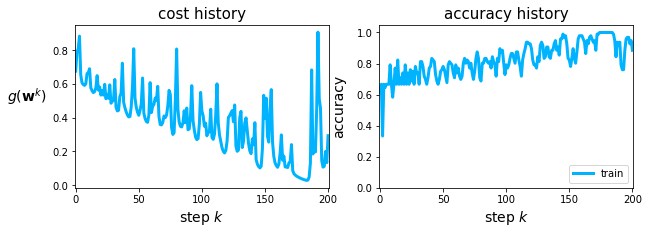

In [15]:
import sys
sys.path.append('../')
datapath = 'mlrefined_datasets/nonlinear_superlearn_datasets/'

example = multi.nonlinear_classification_visualizer.Visualizer(datapath + '2_eggs.csv')
x = example.x.T
y = example.y[np.newaxis,:]

layer_sizes = [2,10,10,10,1]

case1 = multi.basic_lib.super_setup.Setup(x,y)

case1.preprocessing_steps(normalizer = 'standard')

case1.make_train_val_split(train_portion = 1)

case1.choose_cost(name = 'softmax')

layer_sizes = [10,10,10,10]

case1.choose_features(feature_name = 'multilayer_softmax',layer_sizes = layer_sizes,activation = 'tanh',scale = 0.5)

case1.fit(max_its = 200,alpha_choice = 10**(0),verbose = False)

case1.show_histories()

accuracy_hist = np.argmax(case1.train_accuracy_histories[0])


##### Verify my result .

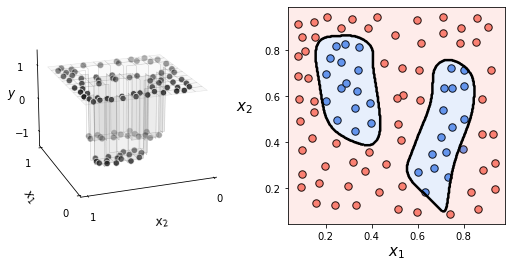

In [13]:
example.static_N2_simple(case1.weight_histories[0][accuracy_hist],case1,view = [20,160])

##### By comparing the figure with figure 13.9, we can come to the conclusion that our data achieves the perfect classification.

## 13.2

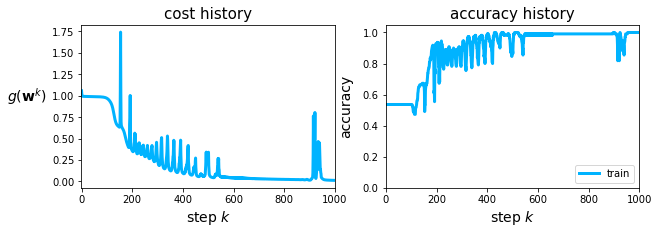

In [37]:
import sys
sys.path.append('../')
datapath = 'mlrefined_datasets/nonlinear_superlearn_datasets/'

example = multi.nonlinear_classification_visualizer.Visualizer(datapath + '3_layercake_data.csv')
x = example.x.T
y = example.y[np.newaxis,:]

w = [2,12,5,3]

case1 = multi.basic_lib.super_setup.Setup(x,y)

case1.preprocessing_steps(normalizer = 'standard')

case1.make_train_val_split(train_portion = 1)

case1.choose_cost(name = 'multiclass_softmax')

layer_sizes = [12,5]
case1.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh',scale = 0.1)

case1.fit(max_its = 1000,alpha_choice = 10**(0),verbose = False)

case1.show_histories()

accuracy_hist = np.argmax(case1.train_accuracy_histories[0])


##### Verify my result .

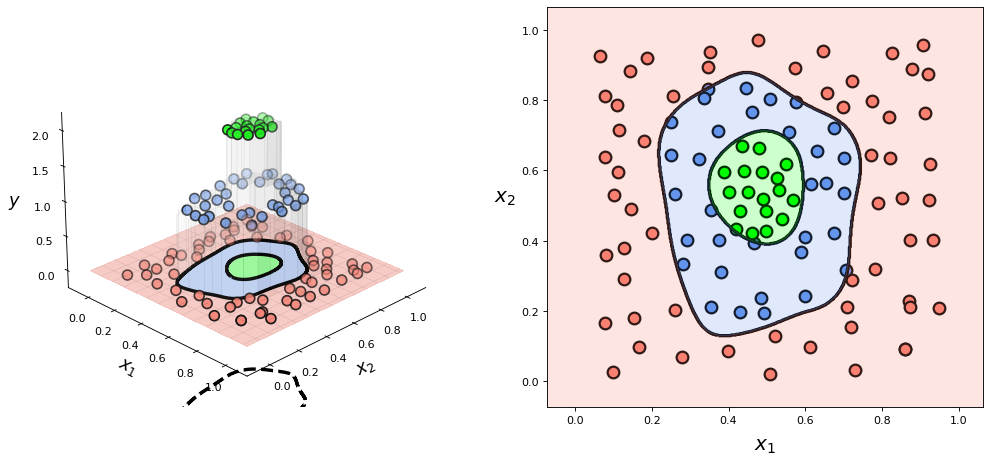

In [38]:
example.multiclass_plot(case1,case1.weight_histories[0][accuracy_hist])

##### By comparing the figure with figure 13.9, we can come to the conclusion that our data achieves the perfect classification.

## 13.3

###### (a) Find the total number Q of tunable parameters in a general L-hidden-layer neural network

 Solution:
 Let's say the L_hidden layer $ i = 0,1,2,3....n-1, n$ . There are $U_{j}$ units. We've come to the equation :
 
 $$Q_{i}=\underset{i=0}{\overset{L}{\sum}}\left(U_{i+1}\right)(1+U_{i})$$

###### (b) Based on your answer in part (a), explain how the input dimension N and number of data points P each contributes to Q. How is this different from what you saw with kernel methods in the previous chapter

Solution:
The part in the parentheses is the same as (a) and is a constant number if N is fixed. Given $U_{0}=N$.
$$Q=\left(\underset{i=1}{\overset{L}{\sum}}\left(U_{i+1}\right)(1+U_{i})\right)+ N*U_1 + U_1$$

And we can find there is no relation with $Q_i$ and $P$ .


As for the difference in kernel methods, we do not use the kernel methods in the expression. 